In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import numpy as np

In [3]:
#read data with modül of pandas 
df = pd.read_csv("C:\DataScience_FinalProject\data\heart.csv")



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
#split dataset in features and target variable
feature_cols=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[feature_cols]
y = df.target

In [8]:
#split dataset in features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

In [9]:
# Veri Standardizasyonu (Z-Score Standardization)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [10]:
# create Naive Bayes modul
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_standardized, y_train)

GaussianNB()

In [11]:

# Evaluate modul by using test
y_pred = naive_bayes_classifier.predict(X_test_standardized)

# Accuracy hesaplamak
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")




Accuracy: 0.8110


In [12]:
# showing Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[318  85]
 [ 70 347]]


Confusion matrix, without normalization
[[114  47]
 [ 17 130]]
Normalized confusion matrix
[[0.70807453 0.29192547]
 [0.11564626 0.88435374]]


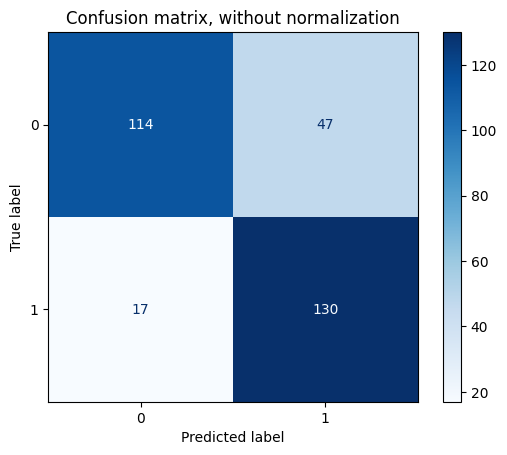

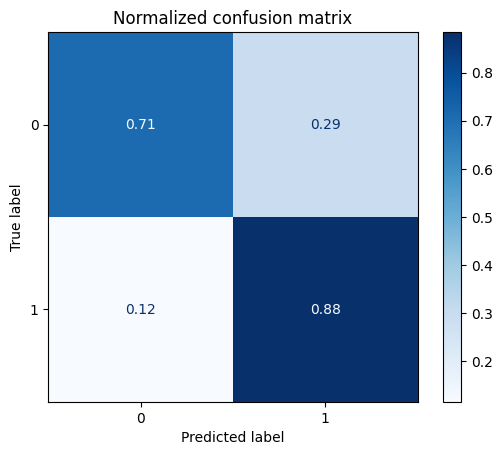

In [15]:
#split dataset in features and target variable
feature_cols=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[feature_cols].values
y = df.target.values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
classifier=GaussianNB().fit(X_train, y_train)



titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:

# Showing Classification Report 
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       403
           1       0.80      0.83      0.82       417

    accuracy                           0.81       820
   macro avg       0.81      0.81      0.81       820
weighted avg       0.81      0.81      0.81       820

